<a href="https://colab.research.google.com/github/kanra20/AritficialIntelligence/blob/main/AmericanBanruptcy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preliminary Data Preprocessing and EDA

## Preliminary Data Preprocessing

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/kanra20/AritficialIntelligence/main/american_bankruptcy.csv'
data = pd.read_csv(url)


In [2]:
data.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [3]:
# Remove 'company_name' column
data.drop('company_name', axis=1, inplace=True)

# Convert 'status_label' from string to numerical format (0 for 'alive', 1 for 'bankruptcy')
data['status_label'] = (data['status_label'] != 'alive').astype(int)

# Save the cleaned data if you need to use it later
data.to_csv('cleaned_dataset.csv', index=False)

# Display the first few rows to confirm changes
print(data.head())

   status_label  year       X1       X2      X3      X4       X5      X6  \
0             0  1999  511.267  833.107  18.373  89.031  336.018  35.163   
1             0  2000  485.856  713.811  18.577  64.367  320.590  18.531   
2             0  2001  436.656  526.477  22.496  27.207  286.588 -58.939   
3             0  2002  396.412  496.747  27.172  30.745  259.954 -12.410   
4             0  2003  432.204  523.302  26.680  47.491  247.245   3.504   

        X7        X8        X9      X10      X11     X12      X13      X14  \
0  128.348  372.7519  1024.333  740.998  180.447  70.658  191.226  163.816   
1  115.187  377.1180   874.255  701.854  179.987  45.790  160.444  125.392   
2   77.528  364.5928   638.721  710.199  217.699   4.711  112.244  150.464   
3   66.322  143.3295   606.337  686.621  164.658   3.573  109.590  203.575   
4  104.661  308.9071   651.958  709.292  248.666  20.811  128.656  131.261   

       X15       X16      X17      X18  
0  201.026  1024.333  401.483  93

## EDA

### Overview of Data Distribution

In [4]:
# Descriptive statistics for all numeric columns
print(data.describe())

# Descriptive statistics for the categorical 'status_label' column
print(data['status_label'].value_counts())


       status_label          year             X1             X2            X3  \
count  78682.000000  78682.000000   78682.000000   78682.000000  78682.000000   
mean       0.066343   2007.506317     880.362485    1594.529029    121.234256   
std        0.248882      5.742768    3928.564794    8930.484664    652.376804   
min        0.000000   1999.000000      -7.760000    -366.645000      0.000000   
25%        0.000000   2002.000000      18.924000      17.038250      1.192000   
50%        0.000000   2007.000000     100.449500     103.661000      7.929500   
75%        0.000000   2012.000000     431.526750     634.548000     47.971750   
max        1.000000   2018.000000  169662.000000  374623.000000  28430.000000   

                 X4            X5             X6            X7            X8  \
count  78682.000000  78682.000000   78682.000000  78682.000000  7.868200e+04   
mean     376.759424    201.605717     129.382453    286.832743  3.414355e+03   
std     2012.023142   1060.766

### Distribution of Financial Indicators

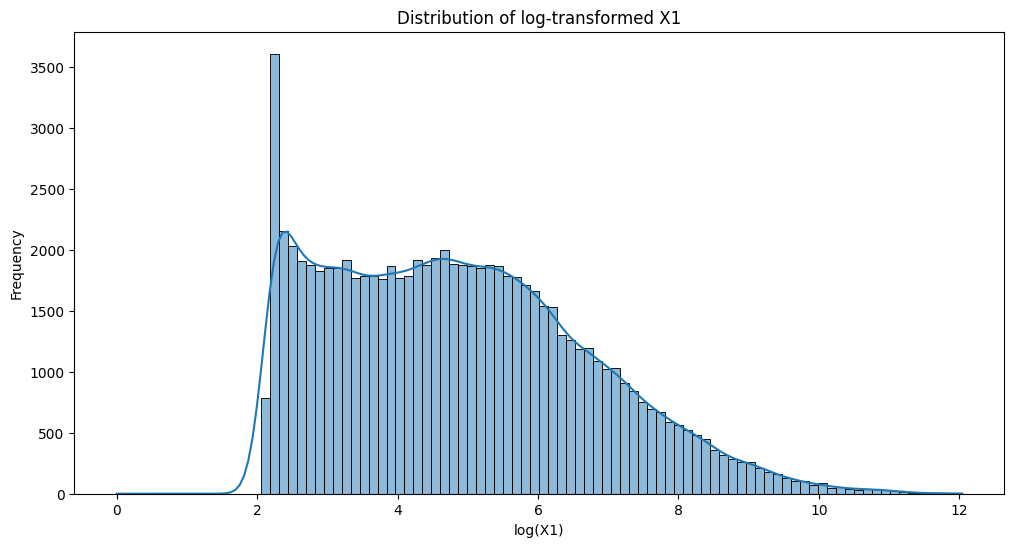

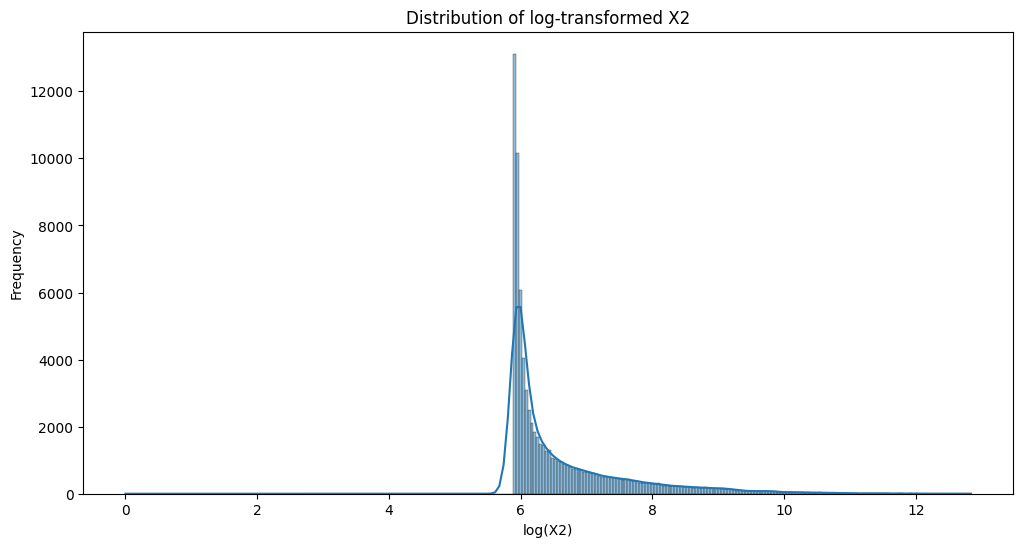

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

metrics = ['X1', 'X2', 'X3']

# Applying log transformation to each metric and plot their distributions
for metric in metrics:
    # Check if any values are less than or equal to 0, as log transformation requires positive values
    if any(data[metric] <= 0):
        # Adding a small constant to adjust values
        data['log_' + metric] = np.log(data[metric] + 1 - data[metric].min())
    else:
        data['log_' + metric] = np.log(data[metric])

    plt.figure(figsize=(12, 6))
    sns.histplot(data['log_' + metric], kde=True)
    plt.title(f'Distribution of log-transformed {metric}')
    plt.xlabel(f'log({metric})')
    plt.ylabel('Frequency')
    plt.show()

### Correlation Analysis

In [ ]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Box Plot Analysis

In [ ]:
# Box plots for financial variables by bankruptcy status
for column in data.columns[2:]:  # Adjust column indexing as needed
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='status_label', y=column, data=data)
    plt.title(f'Box Plot of {column} by Bankruptcy Status')
    plt.xlabel('Bankruptcy Status (0: Non-Bankrupt, 1: Bankrupt)')
    plt.ylabel(column)
    plt.show()

###Trend Analysis Over Years

In [ ]:
metrics_to_plot = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']
status_labels = {0: "Non-Bankrupt", 1: "Bankrupt"}
data['Bankruptcy Status'] = data['status_label'].map(status_labels)
# Plotting the trends over years for each financial metric
for metric in metrics_to_plot:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='year', y=metric, hue='Bankruptcy Status', data=data, markers=True, style='Bankruptcy Status', dashes=False, palette=['blue', 'orange'])
    plt.title(f'Trend of {metric} Over Years')
    plt.xlabel('Year')
    plt.ylabel(metric)
    plt.legend(title='Bankruptcy Status')
    plt.show()

# Model Training

## Data Preprocessing

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the cleaned dataset
data = pd.read_csv('cleaned_dataset.csv')

# Prepare feature matrix X and target vector y
X = data.drop('status_label', axis=1)
y = data['status_label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
X_train_scaled

## Machine Learning

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test_scaled)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of Random Forest model: {accuracy_rf:.2f}')

### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = decision_tree.predict(X_test_scaled)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy of Decision Tree model: {accuracy_dt:.2f}')

### K-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNeighborsClassifier
# You can adjust the number of neighbors depending on your specific dataset characteristics
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test_scaled)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy of K-Nearest Neighbors model: {accuracy_knn:.2f}')

### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize the Support Vector Classifier
svm = SVC(kernel='linear', random_state=42)  # You can try different kernels such as 'rbf'

# Train the model
svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test_scaled)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy of Support Vector Machine model: {accuracy_svm:.2f}')


### Deep Learning

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Predict labels for the test set
y_pred_dl = model.predict(X_test_scaled)
y_pred_dl = [1 if prob > 0.5 else 0 for prob in y_pred_dl.ravel()]

# Calculate accuracy
accuracy_dl = accuracy_score(y_test, y_pred_dl)
print(f'Accuracy of Deep Learning model: {accuracy_dl:.2f}')

## Comparison of Model Accuracies

In [ ]:
import matplotlib.pyplot as plt


accuracies = {
    'Random Forest': 0.94,
    'Decision Tree': 0.90,
    'K-Nearest Neighbors': 0.93,
    'Support Vector Machine': 0.93,
    'Deep Learning': 0.93
}

models = list(accuracies.keys())
accuracy_scores = list(accuracies.values())


plt.figure(figsize=(10, 5))
plt.bar(models, accuracy_scores, color=['green', 'blue', 'red', 'purple', 'orange'])
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim([0.80, 0.95])
plt.show()


# Homemade New Data 2020~2024

In [ ]:
# prompt: can you help me read this as data https://huggingface.co/spaces/DEEMOSTECH/Rodin

!pip install datasets
from datasets import load_dataset

dataset = load_dataset('DEEMOSTECH/Rodin')
print(dataset)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the original dataset
data = pd.read_csv('/content/american_bankruptcy.csv')

# Remove 'company_name' column
data.drop('company_name', axis=1, inplace=True)

# Convert 'status_label' from string to numerical format (0 for 'alive', 1 for 'bankruptcy')
data['status_label'] = (data['status_label'] != 'alive').astype(int)

# Save the cleaned data if you need to use it later
data.to_csv('cleaned_dataset.csv', index=False)

# Prepare feature matrix X and target vector y
X = data.drop('status_label', axis=1)
y = data['status_label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train_scaled, y_train)

# Load the new dataset (2020-2023 data)
new_data = pd.read_csv('newdataset 2020~2023.csv')

# Remove 'company_name' column
new_data.drop('company_name', axis=1, inplace=True)

# Convert 'status_label' from string to numerical format (0 for 'alive', 1 for 'bankruptcy')
new_data['status_label'] = (new_data['status_label'] != 'lived').astype(int)

# Convert all columns to numeric, coercing errors to NaN
new_data = new_data.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (if any)
new_data.dropna(inplace=True)

# Prepare feature matrix X_new and target vector y_new
X_new = new_data.drop('status_label', axis=1)
y_new = new_data['status_label']

# Feature scaling using the same scaler fitted on the original training data
X_new_scaled = scaler.transform(X_new)

# Make predictions on the new dataset
y_pred_new = random_forest.predict(X_new_scaled)

# Calculate accuracy
accuracy_new = accuracy_score(y_new, y_pred_new)

# Print results
print("Accuracy on the new dataset (2020-2023):", accuracy_new)
print("Predicted values:", y_pred_new)
print("Actual values:", y_new.values)
